First things first, let's import our dataset and check the type of variables

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

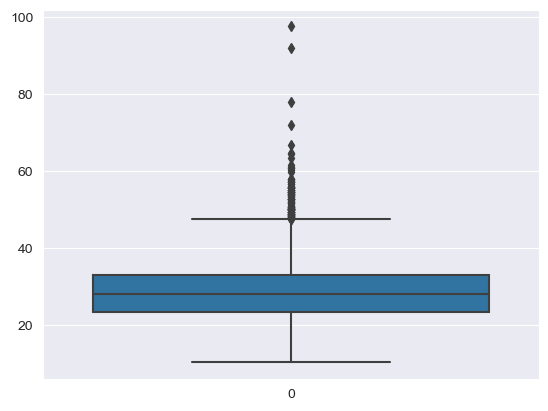

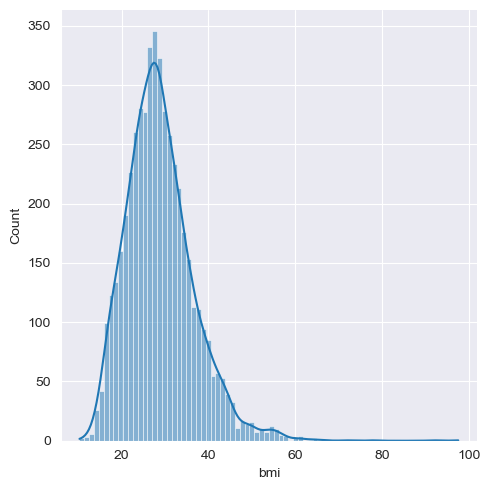

In [6]:
sns.boxplot(data.bmi)
sns.displot(data.bmi, kde=True)

In [7]:
print(data['bmi'].mean())
print(data['bmi'].median())

28.893236911794673
28.1


In [8]:
bmi_median=data['bmi'].median()
data['bmi']=data['bmi'].fillna(bmi_median)

data=data.drop(columns=['id'])

In [9]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
data_copy = data.copy(deep = True)

data_copy["hypertension"] = np.where(data_copy["hypertension"] == 0, "No", "Yes")
data_copy["heart_disease"] = np.where(data_copy["heart_disease"] == 0, "No", "Yes")
data_copy["stroke"] = np.where(data_copy["stroke"] == 0, "No", "Yes")

In [11]:
data_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


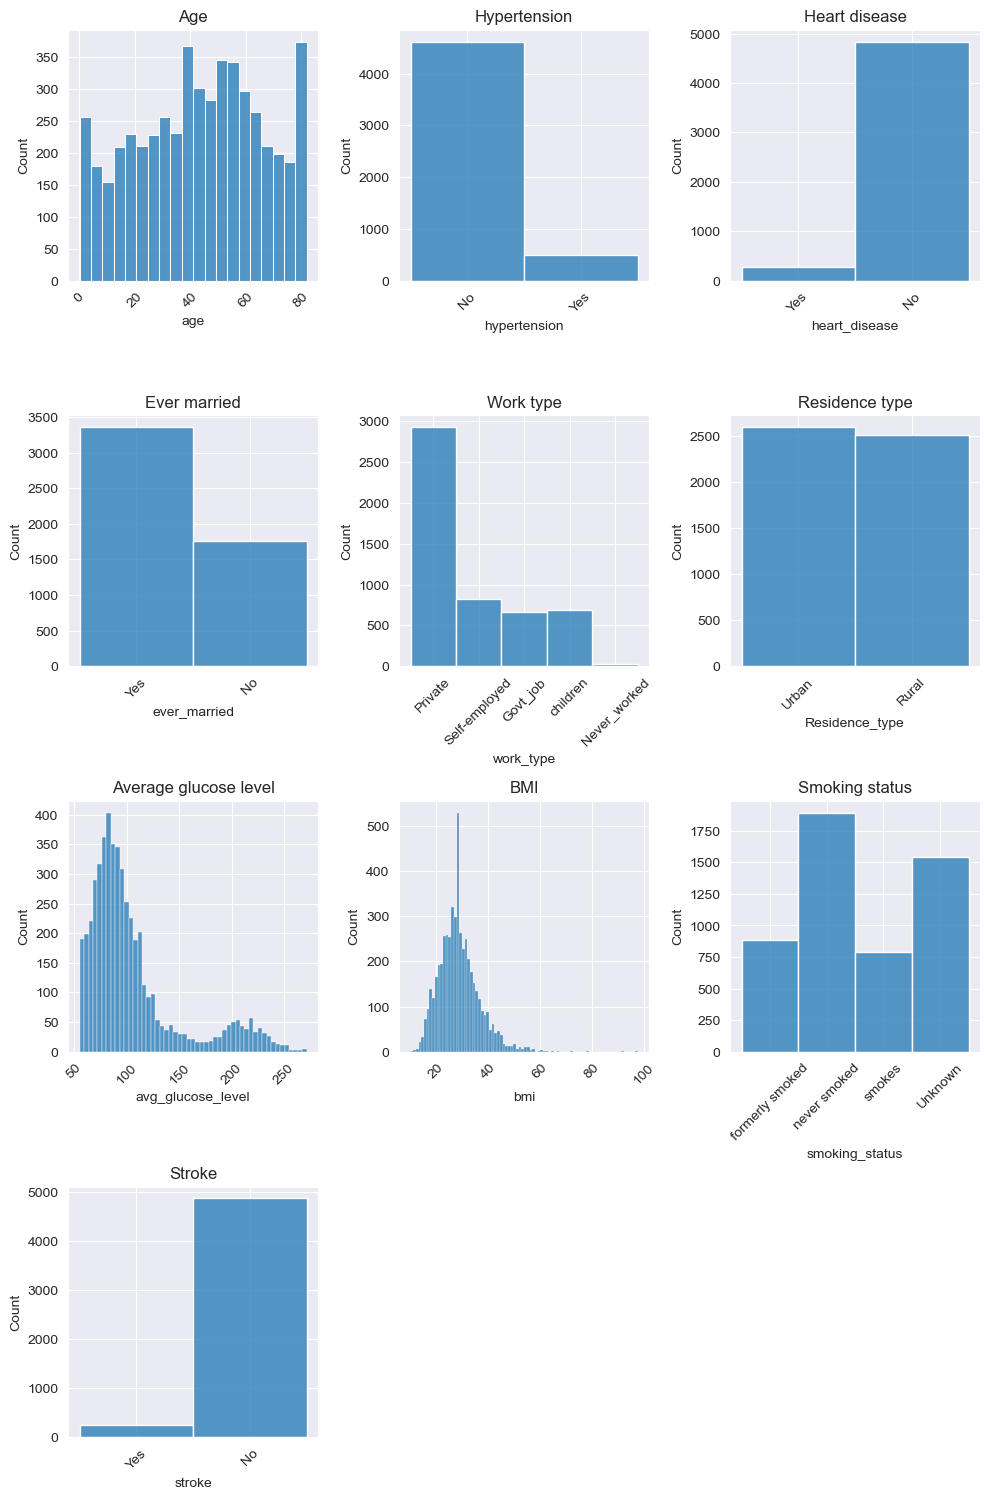

In [12]:
cols = list(data_copy.columns)
cols_data=cols[1:]

labels= ['Age',
          'Hypertension',
          'Heart disease',
          'Ever married',
          'Work type',
          'Residence type',
          'Average glucose level',
          'BMI',
          'Smoking status',
          'Stroke']

plt.figure(figsize=(10,30))
for i in range(len(cols_data)):
    plt.subplot(8,3,i+1)
    plt.title(labels[i])
    plt.xticks(rotation=45)
    sns.histplot(data_copy[cols_data[i]])

plt.tight_layout()

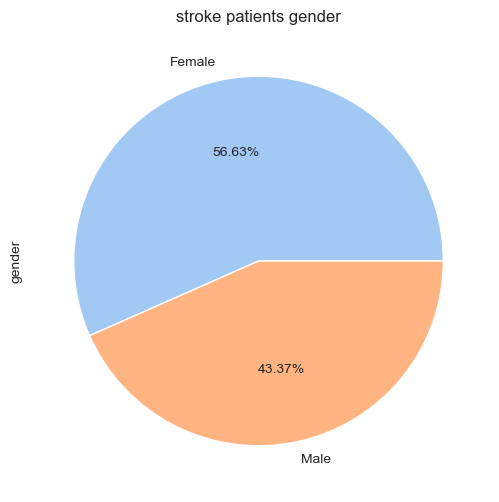

In [13]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:2]

data_stroke['gender'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients gender')

plt.show()

We can see that the most of stroke patients are women, and there are 56.63 percent of all stroke cases

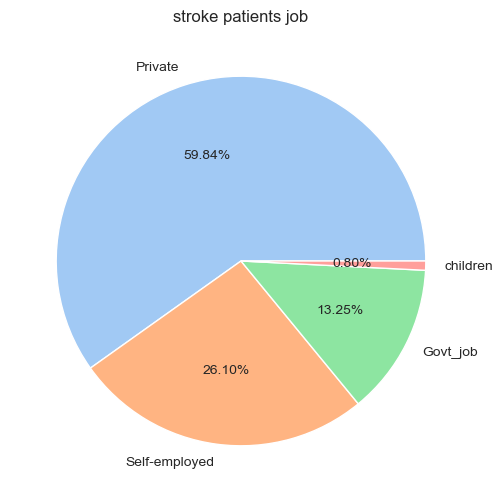

In [14]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:4]

data_stroke['work_type'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients job')
plt.ylabel(None)

plt.show()

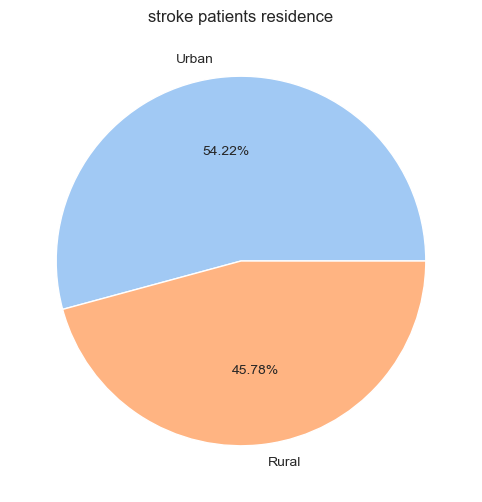

In [15]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:2]

data_stroke['Residence_type'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients residence')
plt.ylabel(None)

plt.show()

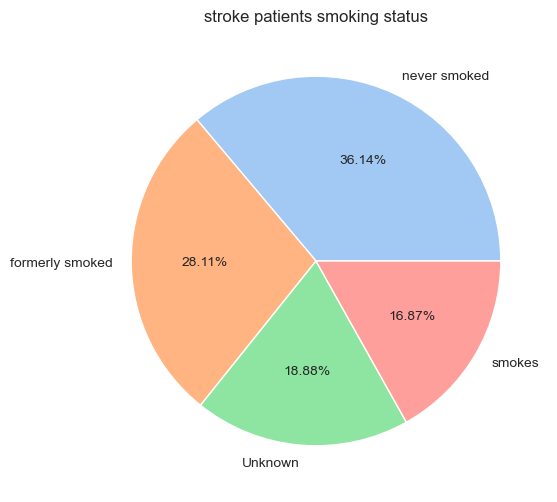

In [16]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:4]

data_stroke['smoking_status'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients smoking status')
plt.ylabel(None)

plt.show()

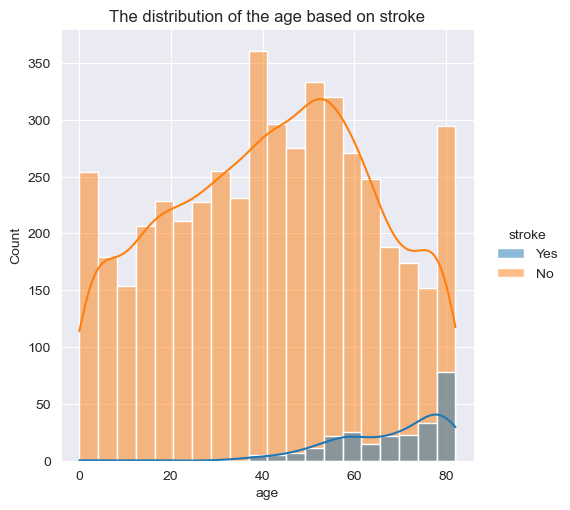

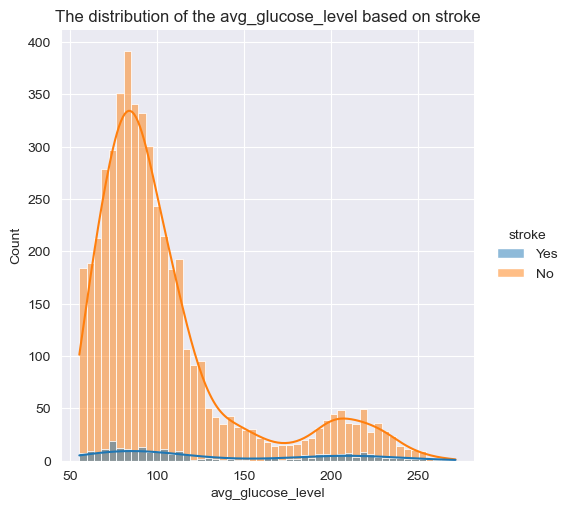

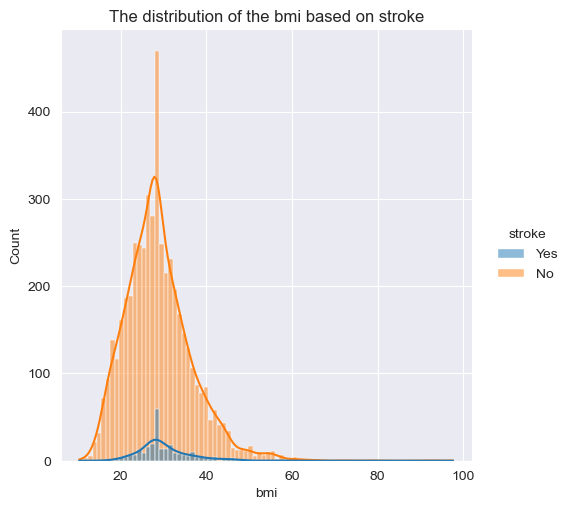

In [20]:
for i in data_copy.columns[:-1]:
    if data_copy[i].dtype == 'float64':
        sns.displot(data = data_copy, x = i, hue = 'stroke', kde = True)
        plt.title('The distribution of the {} based on stroke'.format(i))
        plt.show()

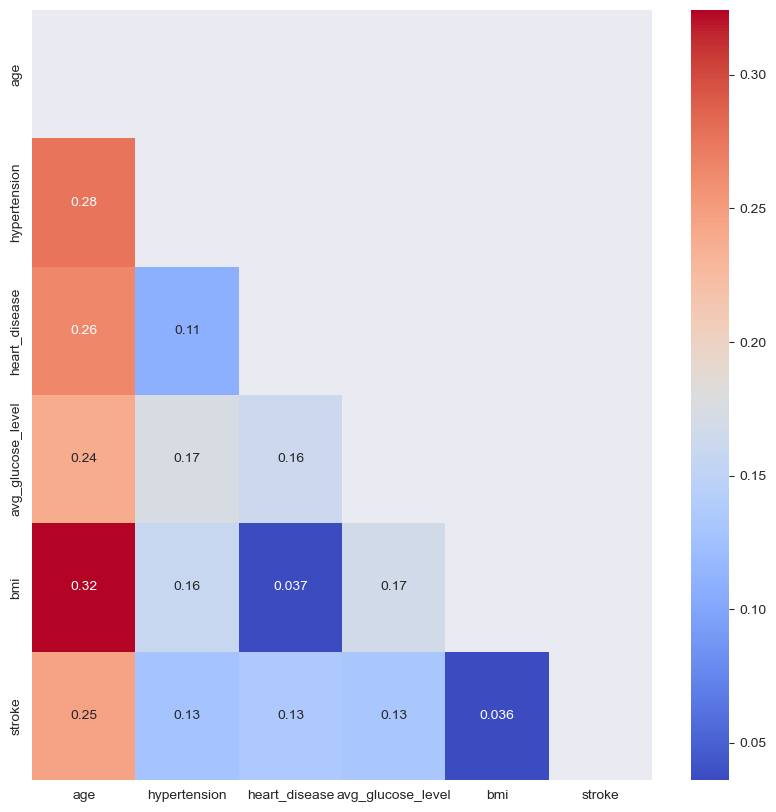

In [21]:
plt.figure(figsize=(10,10))
cor=data.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot = True, cmap=plt.cm.coolwarm)
plt.show()

We can see that age is the most significant factor affecting the occurence of a stroke.

 ### Scikit-learn model

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [23]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [24]:
df= pd.get_dummies(data, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.1,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [25]:
df.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [42]:
X_cat = data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
X_num = data.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis = 1)

X_cat = pd.get_dummies(X_cat)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)
X = pd.concat([X_scaled, X_cat], axis = 1)

y = data['stroke']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 444)

In [44]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4811,0.786070,-0.328602,-0.238947,-0.803409,0.134821,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3614,0.786070,-0.328602,-0.238947,0.127925,-0.306805,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1199,0.918752,3.043196,-0.238947,-0.612151,0.173789,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
1957,-1.842805,-0.328602,-0.238947,0.160169,-1.216037,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
4335,-0.275387,-0.328602,-0.238947,2.785882,1.550625,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [45]:
names = ['Logistic Regression', 'RandomForest Classifier', 'K-Nearest Neighbors Classifier', 'AdaBoost Classifier', 'Decision Tree Classifier', 'Gaussian Naive Bayes','Multi-layer Perceptron classifier', 'SVC', ]

models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(),  AdaBoostClassifier(),DecisionTreeClassifier(), GaussianNB(), MLPClassifier(), SVC()]

results = pd.DataFrame(columns = ['accuracy score',  'ROC AUC score'], index = names)

accuracy=[]
roc_auc=[]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score_a = accuracy_score(y_test, y_pred)
    score_r = roc_auc_score(y_test, y_pred)
    accuracy.append(score_a)
    roc_auc.append(score_r)

results['accuracy score'] = accuracy
results['ROC AUC score'] = roc_auc
results.sort_values(by = 'accuracy score', ascending = False)

,accuracy score,ROC AUC score
SVC,0.966732,0.500000
Logistic Regression,0.965753,0.499494
RandomForest Classifier,0.964775,0.513188
AdaBoost Classifier,0.964775,0.498988
K-Nearest Neighbors Classifier,0.963796,0.498482
Multi-layer Perceptron classifier,0.962818,0.540575
Decision Tree Classifier,0.915851,0.573083
Gaussian Naive Bayes,0.171233,0.542957


### Logistic regression

In [46]:
log_reg = LogisticRegression(random_state=444)

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
print('accuracy: %f' %acc)
print('roc_auc: %f' %roc)

accuracy: 0.965753
roc_auc: 0.499494


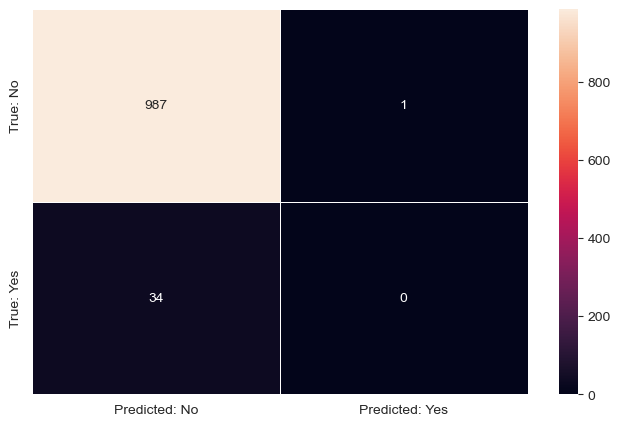

In [47]:
plt.figure(figsize = (8,5))

cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'], index = ['True: No', 'True: Yes'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', linewidths=.5)

plt.show()

<Figure size 800x500 with 0 Axes>

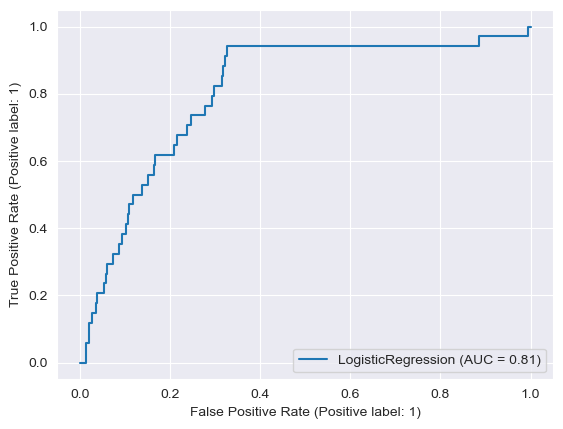

In [50]:
plt.figure(figsize = (8,5))
plot_roc_curve(log_reg, X_test, y_test)
plt.show()

### SVC

In [52]:
svc=SVC(random_state=444, max_iter=-1)

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
print('accuracy: %f' %acc)
print('roc_auc: %f' %roc)

accuracy: 0.966732
roc_auc: 0.500000


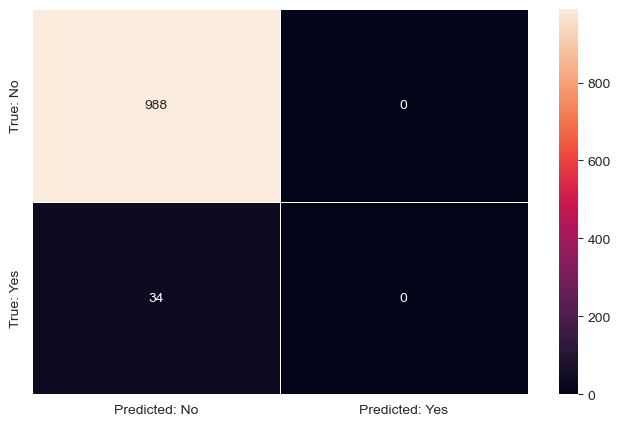

In [53]:
plt.figure(figsize = (8,5))

cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'], index = ['True: No', 'True: Yes'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', linewidths=.5)

plt.show()

<Figure size 800x500 with 0 Axes>

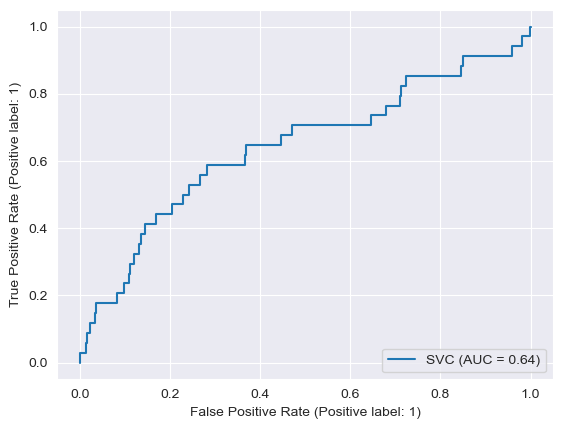

In [54]:
plt.figure(figsize = (8,5))
plot_roc_curve(svc, X_test, y_test)
plt.show()

### RandomForest Classifier

In [55]:
def get_score(x):
    rand_forest = RandomForestClassifier(n_estimators=x,  random_state=444)

    rand_forest.fit(X_train, y_train)
    y_pred = rand_forest.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    return acc

In [56]:
results_rand_forest = {}
estimators = [10,100,1000,10000]

for i in estimators:
    results_rand_forest[i] = get_score(i)

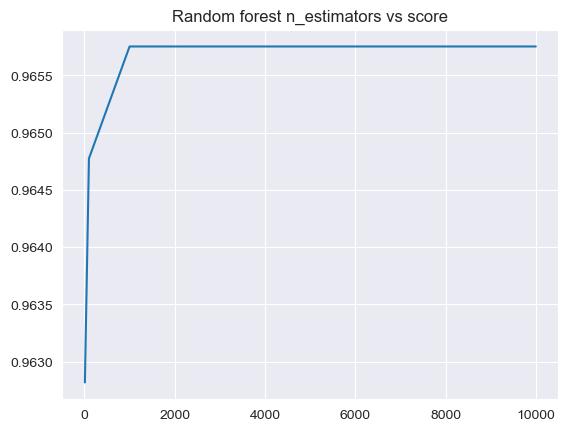

In [57]:
plt.plot(list(results_rand_forest.keys()), list(results_rand_forest.values()))
plt.title("Random forest n_estimators vs score")
plt.show()

In [61]:
rf = RandomForestClassifier(n_estimators=1000, random_state=444)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('final model accuracy score: %f' %accuracy_score(y_test, y_pred))
print('final model ROC AUC score: %f' %roc_auc_score(y_test, y_pred))

final model accuracy score: 0.965753
final model ROC AUC score: 0.499494


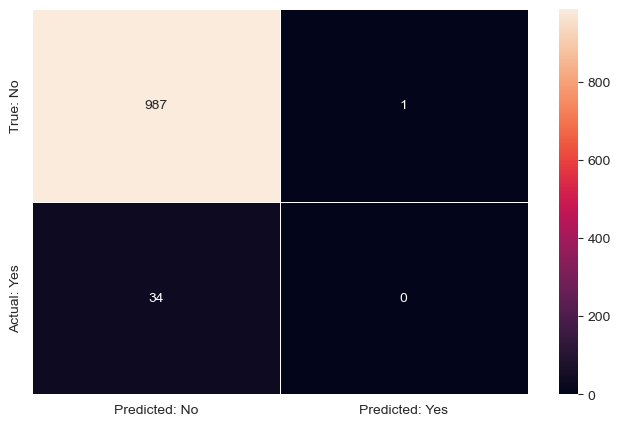

In [62]:
plt.figure(figsize = (8,5))

cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'], index = ['True: No', 'Actual: Yes'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', linewidths=.5)

plt.show()

<Figure size 800x500 with 0 Axes>

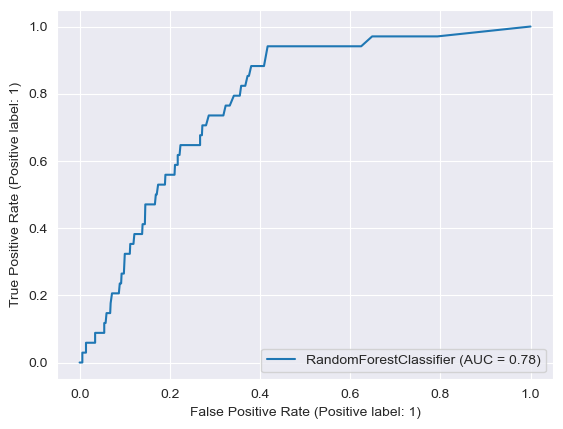

In [63]:
plt.figure(figsize = (8,5))
plot_roc_curve(rf, X_test, y_test)
plt.show()

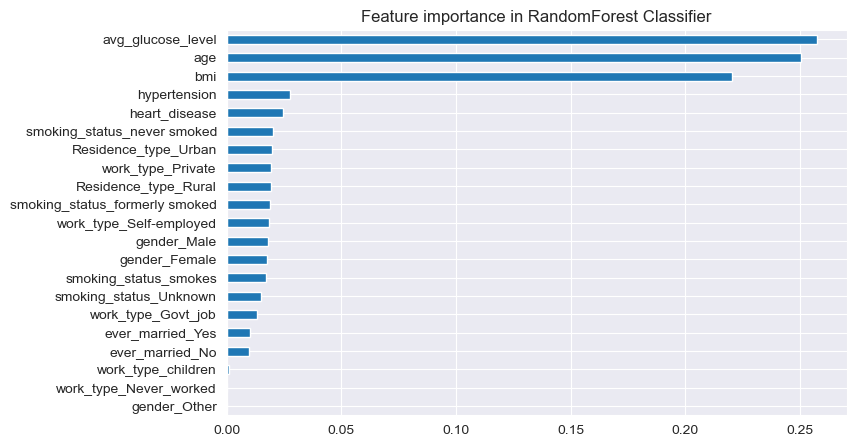

In [64]:
plt.figure(figsize = (8,5))

importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
sort = importances_rf.sort_values()
sort.plot(kind = 'barh')

plt.title('Feature importance in RandomForest Classifier')
plt.show()